# 深層学習day2

# 勾配消失問題

### 確認テスト①
#### Q.
$$
z=t^2\\t=x+y
$$
連鎖律の原理を使い、dz/dxを求めよ。
#### A.
$
\frac{\partial z}{\partial x}
=\frac{\partial z}{\partial t}\frac{\partial t}{\partial x}
=2t\\
=2(x+y)
$
___

### 勾配消失問題の復習
* 誤差逆伝播法が下位層に進んでいくに連れて、勾配がどんどん緩やかになっていく
* 勾配降下法による、更新では下位層のパラメータはほとんど変わらず、訓練は最適値に収束しなくなる
* sigmoid関数で起きやすい
___

### シグモイド関数
$$\sigma(x)=\frac1{1+e^{-x}}$$
* 2値分類の出力層に使われる
* 0 ~ 1の間を緩やかに変化する関数で、ステップ関数ではON/OFFしかない状態に対し、信号の強弱を伝えられるようになり、予想ニューラルネットワーク普及のきっかけとなった
* 課題...大きな値では出力の変化が微小なため、勾配消失問題を引き起こす事があった
___

### 確認テスト②
#### Q.
シグモイド関数を微分した時、入力値が0の時に最大値をとる。その値として正しいものを選択肢から選べ。
#### A.
$
\sigma(0)=0.5\\
\frac{\partial \sigma(x)}{\partial x}=\sigma(x)(1-\sigma(x))
$

より、(2)0.25
___

### 勾配消失の解決法
* 活性化関数の選択
* 重みの初期値設定
* バッチ正規化
___

### Relu関数
$$
f(x) = 
\left\{
\begin{array}{ll}x & (x>0) \\
0 & (x \leq 0)
\end{array}
\right.$$
* 今最も使われている活性化関数
* 勾配消失問題の回避とスパース化に貢献することで良い成果をもたらしている
___

### 重みの初期値 -Xavier
* 対応の活性化関数...Relu関数、シグモイド関数、双曲線正接関数
* 初期値の設定方法...**重みの要素を、前の層のノード数の平方根で除算した値**
___

### 重みの初期値 -He
* 対応の活性化関数...Relu関数
* 初期値の設定方法...**重みの要素を、前の層のノード数の平方根で除算した値**に対し√２をかけ合わせた値
___

### 確認テスト③
#### Q.
重みの初期値に0を設定すると、どのような問題が発生するか。簡潔に説明せよ。
#### A.
全ての重みの値が均一に更新される。正しく学習が行われない可能性がある。
___

### バッチ正規化
* ミニバッチ単位で、入力値のデータの偏りを抑制する手法
* 活性化関数に値を渡す前後に、バッチ正規化の処理を孕んだ層を加える
___

### 確認テスト④
#### Q.
一般的に考えられるバッチ正規化の効果を2点挙げよ。
#### A.
1. 中間層の重みの更新が安定化され学習速度が上がる
2. 過学習が起きにくい(ドロップアウトとの相性は悪いとの記事もある)
___

### ハンズオン

In [1]:
import numpy as np
from common import layers
from collections import OrderedDict
from common import functions
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet

* 必要なライブラリのインポート
* 結局、配布されたものを自作ライブラリとしてインポートすることにした

In [75]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


* データの読み込み後、サイズを出力
* 前処理に関する部分は、自作モジュール内に記載されている

In [76]:
network = MultiLayerNet(input_size=784, 
                        hidden_size_list=[40, 20], 
                        output_size=10, activation='relu',
                        weight_init_std=0.01)

* 多層ネットワークの初期化
* 活性化関数...Relu
* 初期化方法...ランダム(設定なし)

In [77]:
iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
plot_interval=10

* ハイパーパラメータを定義
* その他必要なパラメータを定義

In [26]:
train_loss_list = []
accuracies_train = []
accuracies_test = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]
    grad = network.gradient(x_batch, d_batch)
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        # print('accuracy_train{}:'.format(i+1), str(accr_train))
        # print('accuracy_test{}:'.format(i+1), str(accr_test))

* Relu関数で、実際に学習
* 学習履歴の出力は省略する

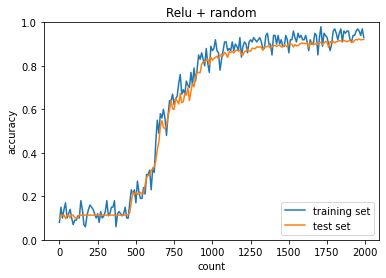

In [27]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("Relu + random")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.show()

* 学習履歴の描画
* 途中からではあるが、学習が進み、正解率もかなり高く収束している

In [28]:
network = MultiLayerNet(input_size=784, 
                        hidden_size_list=[40, 20], 
                        output_size=10, activation='relu',
                        weight_init_std='He')

* Relu+Heを試す

In [29]:
train_loss_list = []
accuracies_train = []
accuracies_test = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]
    grad = network.gradient(x_batch, d_batch)
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

* パラメータ類は同じものを使用

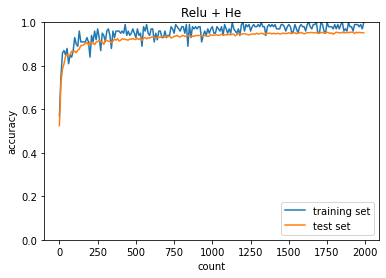

In [30]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("Relu + He")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.show()

* 早い時点で、学習が進んでいるのがわかる
* 正解率も、初期値の設定をしなかった結果に比べて、高い
___

# 学習率最適化手法

### 学習率の決め方
* 学習率最適化手法(オプティマイザ)を利用して、学習率を最適化
* 初期の学習率を大きくし、徐々に小さくしていくのが主流
___

### 勾配降下法(参考)
$$w^{t+1}=w^t-\varepsilon\nabla E$$
* 誤差をパラメータで微分したものと、学習率の積を減算する
___

### モメンタム
$$
V_t=\mu V_{t-1}-\epsilon\nabla E\\
w^{t+1}=w^t+V_t
$$
* 誤差をパラメータで微分したものと、学習率の積を減算する
* 現在の重みに、前回の重みを減算した値と慣性の積を加算する
* 局所最適解に陥りにくい
* 学習の収束が早い
___

### AdaGrad
$$
h_0=\theta\\
h_t=h_{t-1}+(\nabla E)^2\\
w^{t+1}=w^t-\epsilon\frac{1}{\sqrt{h_t}+\theta}\nabla E
$$
* 誤差をパラメータで微分したものと、再定義した学習率の積を減算する
* 勾配の緩やかな斜面に対して、最適値に近づける
* 学習率が徐々に小さくなるので、**鞍点問題**を起こすことがある
___

### RMSprop
$$
h_t=\alpha h_{t-1}+(1-\alpha)(\nabla E)^2\\
w^{t+1}=w^t-\epsilon\frac{1}{\sqrt{h_t}+\theta}\nabla E
$$
* 誤差をパラメータで微分したものと、再定義した学習率の積を減算する
* 局所最適解に陥りにくい
* ハイパーパラメータの調整が必要な場合が少ない
___

### Adam
* モメンタムの、過去の勾配の指数関数的減衰平均
* RMSpropの、過去の勾配の2乗の指数関数的減衰平均
* 上記の2つをそれぞれ孕んだ手法
___

### ハンズオン

In [14]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet

* 必要なライブラリのインポート

In [59]:
import warnings
warnings.filterwarnings('ignore')

* 警告の非表示

In [60]:
network = MultiLayerNet(input_size=784, 
                        hidden_size_list=[40, 20], 
                        output_size=10, activation='relu', 
                        weight_init_std=0.01,
                        use_batchnorm=False)

* 多層ネットワークの初期化
* 活性化関数...sigmoid
* 初期化方法...ランダム(設定なし)
* バッチ正規化...なし

In [61]:
momentum = 0.9

* モメンタムに必要なハイパーパラメータを定義
* その他必要なパラメータは同じものを使用

In [62]:
train_loss_list = []
accuracies_train = []
accuracies_test = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

* 実際に学習
* 最適化手法は「momentum」
* 学習データは同じものを使用
* 学習履歴の出力は省略する

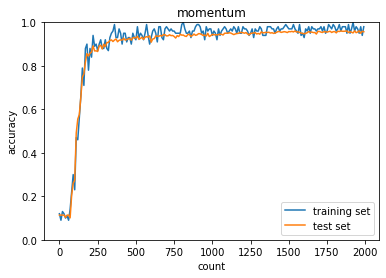

In [63]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("momentum")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.show()

* 学習履歴の描画
* 初期値の設定がないにもかかわらず、学習は上手くいっている

In [64]:
network = MultiLayerNet(input_size=784, 
                        hidden_size_list=[40, 20], 
                        output_size=10, activation='relu', 
                        weight_init_std=0.01,
                        use_batchnorm=False)

* 再び初期化

In [46]:
decay_rate = 0.99

* RMSpropに必要なハイパーパラメータを定義
* その他必要なパラメータは同じものを使用

In [65]:
train_loss_list = []
accuracies_train = []
accuracies_test = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)                
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

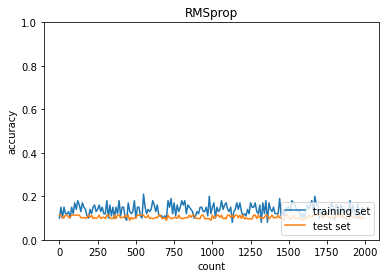

In [66]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("RMSprop")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.show()

* 学習履歴の描画
* 学習は上手くいかなかった

In [78]:
network = MultiLayerNet(input_size=784, 
                        hidden_size_list=[40, 20], 
                        output_size=10, activation='relu', 
                        weight_init_std=0.01,
                        use_batchnorm=False)

* 再び初期化

In [79]:
beta1 = 0.9
beta2 = 0.999

In [80]:
train_loss_list = []
accuracies_train = []
accuracies_test = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)

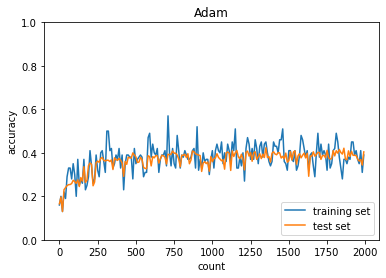

In [81]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("Adam")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.show()

* 学習履歴の描画
* 学習は上手くいかなかった
* 重みの初期値にかなり依存するように感じた
___

# 過学習

### 過学習の復習
* テスト誤差と訓練誤差とで学習曲線が乖離すること
* 原因...ネットワークの自由度が高い(パラメータの数が多い) 
___

### 正則化
* ネットワークの自由度(層数、ノード数、パラメータの値etc...)を制約すること
* 正則化手法を利用して過学習を抑制する
___

### 確認テスト⑤
#### Q.
機械学習で使われる線形モデル(線形回帰、主成分分析...etc)の正規化は、モデルの重みを抑制することで可能となる。
前述の線形モデルの正規化手法の中にリッジ回帰という手法があり、その特徴として正しいものを選択しなさい。
#### A.
(a)ハイパーパラメータを大きな値に設定するとすべての重みが限りなく0に近づく
___

### Weight decay(荷重減衰)
* 過学習の原因...重みが大きい値をとる
* 過学習の解決策...誤差に対して、正則化項を加算することで、重みを抑制する
___

### L1、L2正則化
$$
E_n(w)+\frac{1}{p}\lambda\|x\|_p\\
\|x\|_p=(|x_1|^p+...+|x_n|^p)^{\frac{1}{p}}
$$
* p = 1の場合、L1正則化
* p = 2の場合、L2正則化
___

### 確認テスト⑥
#### Q.
下図について、L1正則化を表しているグラフはどちらか答えよ。
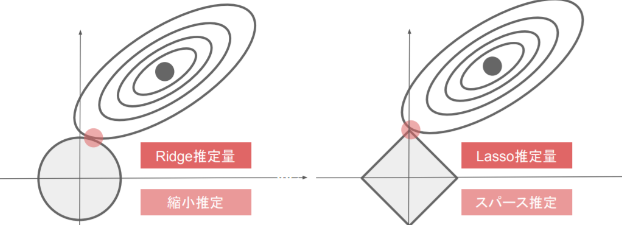
#### A.
* 右(Lasso、スパース推定、ひし形で判断できる)
___

### ドロップアウト
* ランダムにノードを削除して学習させること
* データ量を変化させずに、異なるモデルを学習させていると解釈できる
___

### ハンズオン

In [95]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer

* 必要なライブラリのインポート

In [96]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)
x_train = x_train[:300]
d_train = d_train[:300]
print(x_train.shape)

(300, 784)


* データの読み込み後、サイズを出力
* 過学習を再現するために、学習データを削減

In [97]:
network = MultiLayerNet(input_size=784, 
                        hidden_size_list=[100, 100, 100, 100, 100, 100],
                        output_size=10
                       )
optimizer = optimizer.SGD(learning_rate=0.01)
iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

* ネットワークの初期化
* 過学習を再現するために、ノード数を多くしている

In [92]:
train_loss_list = []
accuracies_train = []
accuracies_test = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

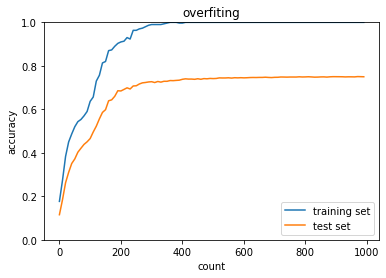

In [93]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("overfiting")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.show()

* 学習履歴の描画
* 想定通り、過学習の傾向が見られる

In [98]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

* ドロップアウト層の実装関数

In [100]:
from common import optimizer
use_dropout = True
dropout_ratio = 0.15
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)

* ネットワークの初期化
* 変更点は、ドロップアウト層の追加のみ

In [101]:
train_loss_list = []
accuracies_train = []
accuracies_test = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

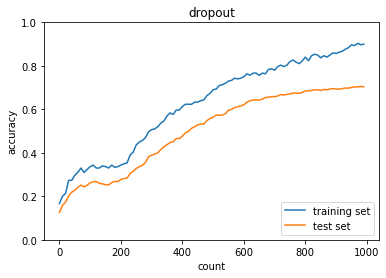

In [102]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("dropout")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.show()

* 学習履歴の描画
* 前回の結果と比べ、過学習を抑制できている
___

# 畳み込みニューラルネットワークの概念 

### CNNの構成図(例)
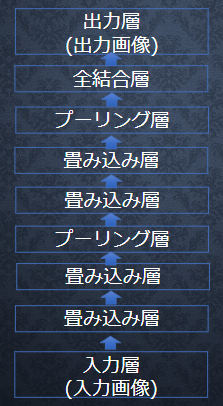
* 基本的に、畳み込み層の後にプーリング層が来る
___

### 畳み込み層
* 画像の場合、縦、横、チャンネルの3次元のデータをそのまま学習し、次に伝えることができる
* 入力値に対して、重み(フィルター)との積和を取る
* バイアス、活性化関数の概念もある
* パディング...入力画像のピクセルの周りにピクセルを囲む(0で囲む場合、0パディングという)
* ストライド...フィルタが画像を移動する間隔
* チャンネル...カラー画像はR、G、Bの3チャンネル
___

### プーリング層
* 対象領域のMax値または、平均値を取得する
* 入力画像を小さくするために利用される
* フィルタや重みは利用しない
___

### 確認テスト⑦
#### Q.
サイズ6×6の入力画像を、サイズ2×2のフィルタで畳み込んだ時の出力画像のサイズを答えよ。なおストライドとパディングは1とする。
#### A.
$$
O=\frac{H+2P-F}{S}+1
$$
でもとまる。
$$
\frac{6+2\times1-2}{1}+1=7
$$
より、7×7
___

### ハンズオン

In [11]:
import pickle
import numpy as np
from collections import OrderedDict
from common import layers
from common import optimizer
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from common import optimizer

* 必要なライブラリのインポート

In [4]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_data.shape
    out_h = (H + 2 * pad - filter_h)//stride + 1
    out_w = (W + 2 * pad - filter_w)//stride + 1
    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3)
    col = col.reshape(N * out_h * out_w, -1)
    return col

* im2col...多次元配列を2次元配列へ、可逆的に変換する
* 2次元で処理することで、高速な行列演算ができるnumpyの恩恵を最大限に受けられる

In [7]:
def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_shape
    out_h = (H + 2 * pad - filter_h)//stride + 1
    out_w = (W + 2 * pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2) # (N, filter_h, filter_w, out_h, out_w, C)
    img = np.zeros((N, C, H + 2 * pad + stride - 1, W + 2 * pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]

* col2im...2次元配列を多次元配列(画像)へと変換する

In [10]:
class SimpleConvNet:
    def __init__(self, input_dim=(1, 28, 28), conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']        
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2 * filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size / 2) * (conv_output_size / 2))

        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Conv1'] = layers.Convolution(self.params['W1'], self.params['b1'], conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = layers.Relu()
        self.layers['Pool1'] = layers.Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = layers.Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = layers.Relu()
        self.layers['Affine2'] = layers.Affine(self.params['W3'], self.params['b3'])
        self.last_layer = layers.SoftmaxWithLoss()

    def predict(self, x):
        for key in self.layers.keys():
            x = self.layers[key].forward(x)
        return x
        
    def loss(self, x, d):
        y = self.predict(x)
        return self.last_layer.forward(y, d)

    def accuracy(self, x, d, batch_size=100):
        if d.ndim != 1 : d = np.argmax(d, axis=1)
        acc = 0.0
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            td = d[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == td) 
        return acc / x.shape[0]

    def gradient(self, x, d):
        self.loss(x, d)
        dout = 1
        dout = self.last_layer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
        grad = {}
        grad['W1'], grad['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grad['W2'], grad['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grad['W3'], grad['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        return grad

* 畳み込み層、プーリング層各一層ずつのシンプルなCNN

In [12]:
(x_train, d_train), (x_test, d_test) = load_mnist(flatten=False)
x_train, d_train = x_train[:5000], d_train[:5000]
x_test, d_test = x_test[:1000], d_test[:1000]

network = SimpleConvNet(input_dim=(1,28,28), conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
optimizer = optimizer.Adam()

In [13]:
iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
plot_interval=10

In [14]:
train_loss_list = []
accuracies_train = []
accuracies_test = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]
    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)

    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

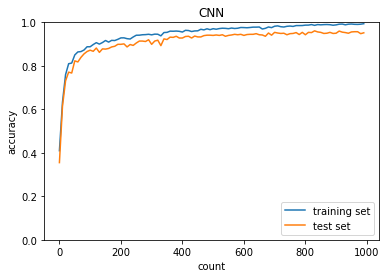

In [15]:
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("CNN")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.show()

* 実際に学習
* 時間は結構かかった
* 学習はかなり上手くいっている
___

# 最新のCNN

### AlexNet
* 2012年のILSVRCで優勝したCNN
* ReLUを主に用いる
* データ拡張、局所応答正規化、ドロップアウトにより、過学習を対策している
* 複数GPUを用いた並列化(当時は珍しかった)
___

### VGG
* 2014年のILSVRCで準優勝したCNN
* AlexNetよりもネットワークを深くしている
* 小さなフィルターを使った畳み込み層を2つから4つ連続して重ね、その間にプーリング層でサイズを半分にするのを繰り返す
___

### GoogleNet
* 2014年のILSVRCで優勝したCNN
* 異なるサイズの畳み込み層を並列に並べたインセプション（Inception）モジュールを組み合わせている
* 全結合層の代わりにGlobal Average Pooling(GAP)を導入している
___

### ResNet
* 2015年のILSVRCで優勝したCNN
* スキップ・コネクション構造を取り入れている
* はじめてヒトの認識精度の５％を超えた
___

### EfficientNet
* Compound Coefficientに基づいて、深さや広さ、解像度を最適化しながらスケール調整する
* 小さなモデルで効率良く高い精度を達成している
___